<a href="https://colab.research.google.com/github/BickNutler/Data-Science-Capstone-Two/blob/main/Nicholas_Butler_Capstone_Two_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTE: This project was completed with the assistance of Google Colab and its built in Gemini AI.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/adult_combined_cleaned.csv')
display(df.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [3]:
for col in df.columns:
    print(f"Column '{col}': {df[col].nunique()} unique values")

Column 'age': 74 unique values
Column 'workclass': 9 unique values
Column 'fnlwgt': 28523 unique values
Column 'education': 16 unique values
Column 'education-num': 16 unique values
Column 'marital-status': 7 unique values
Column 'occupation': 15 unique values
Column 'relationship': 6 unique values
Column 'race': 5 unique values
Column 'sex': 2 unique values
Column 'capital-gain': 123 unique values
Column 'capital-loss': 99 unique values
Column 'hours-per-week': 96 unique values
Column 'native-country': 42 unique values
Column 'income': 2 unique values


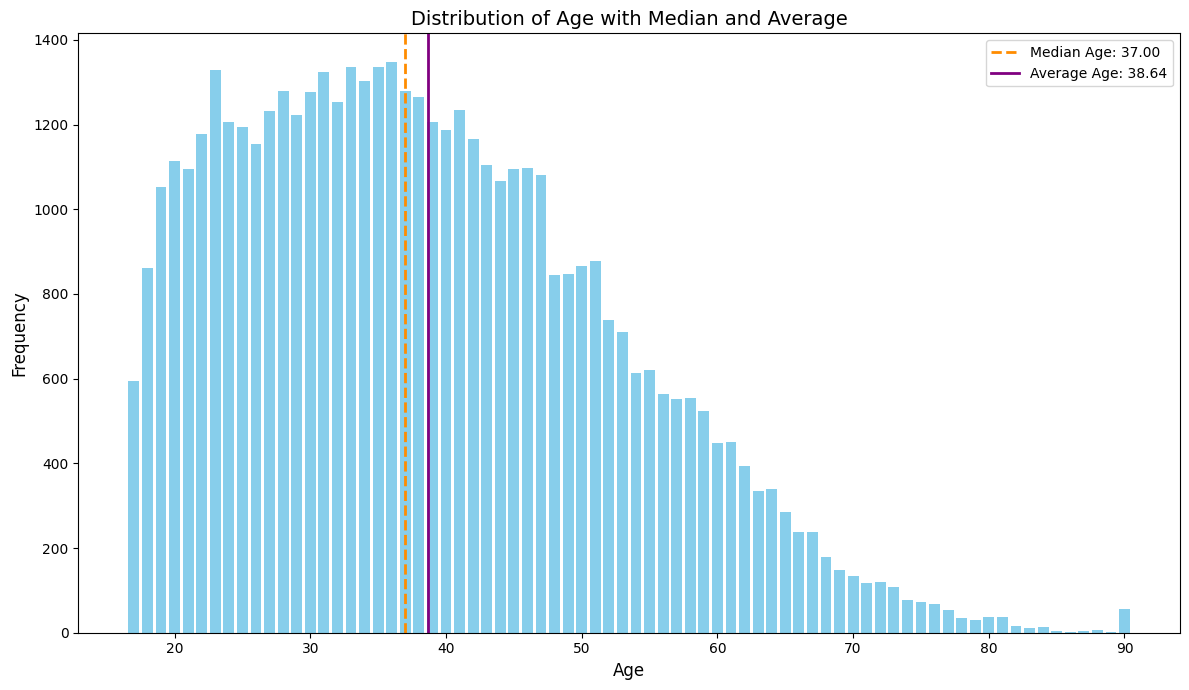

In [4]:
# Calculate median and mean
median_age = df['age'].median()
mean_age = df['age'].mean()

# Get the value counts and sort the index
age_counts = df['age'].value_counts().sort_index()
ages = age_counts.index
frequencies = age_counts.values

plt.figure(figsize=(12, 7))
# Change bar color
ax = plt.bar(ages, frequencies, width=0.8, color='skyblue') # Changed bar color

plt.title('Distribution of Age with Median and Average', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Change line colors for better contrast
plt.axvline(x=median_age, color='darkorange', linestyle='--', linewidth=2, label=f'Median Age: {median_age:.2f}') # Changed median line color
plt.axvline(x=mean_age, color='purple', linestyle='-', linewidth=2, label=f'Average Age: {mean_age:.2f}') # Changed average line color

plt.legend()
plt.tight_layout()
plt.show()

Based on the above plot, we can see our median age to be 37 and average age to be 38.64. The distribution appears to have a somewhat normal distribution, except the left tail is cut off due to the minimum particpant age of 17 and the right tail extends out, skewing the plot positively, very much in line with global population age distributions. Nothing abnormal here. If we were to look at data from the current year, 2025, we would likely see that this average/median age, would have increased (assuming same participant samping technique and parameters) due to the decrease in birth rate, as well as the improvements in medical practices. We will go ahead and make two engineered features which breakdown the age into both 5 and 10 year bins, and then all three age columns in our model.

In [5]:
min_age = df['age'].min()
max_age = df['age'].max()

print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")

Minimum Age: 17
Maximum Age: 90


In [6]:
min_age = df['age'].min()
max_age = df['age'].max()

# Calculate bin edges for 5-year bins
# Determine a step close to 5 that divides the range (max_age - min_age) as evenly as possible
range_age = max_age - min_age
num_bins_5 = round(range_age / 5)
step_5 = range_age / num_bins_5
# Ensure integer boundaries
bins_5 = np.arange(min_age, max_age + step_5, step_5)
# Ensure integer boundaries and include max_age
bins_5 = np.append(bins_5.astype(int), max_age)
bins_5 = np.unique(bins_5) # Remove duplicates if max_age was already an integer boundary

# Adjust labels to reflect inclusive upper bound for the last bin if needed
labels_5 = []
for i in range(len(bins_5)-1):
    if i == len(bins_5) - 2: # This is the last bin
        labels_5.append(f'{int(bins_5[i])}-{int(bins_5[i+1])}') # Make last bin inclusive
    else:
        labels_5.append(f'{int(bins_5[i])}-{int(bins_5[i+1])-1}')


# Create age bins for every 5 years using calculated bins
df['age_5_year_bins'] = pd.cut(df['age'], bins=bins_5, right=True, labels=labels_5, include_lowest=True)


# Calculate bin edges for 10-year bins
# Determine a step close to 10 that divides the range (max_age - min_age) as evenly as possible
num_bins_10 = round(range_age / 10)
step_10 = range_age / num_bins_10
# Ensure integer boundaries
bins_10 = np.arange(min_age, max_age + step_10, step_10)
# Ensure integer boundaries and include max_age
bins_10 = np.append(bins_10.astype(int), max_age)
bins_10 = np.unique(bins_10) # Remove duplicates if max_age was already an integer boundary


# Adjust labels to reflect inclusive upper bound for the last bin if needed
labels_10 = []
for i in range(len(bins_10)-1):
    if i == len(bins_10) - 2: # This is the last bin
        labels_10.append(f'{int(bins_10[i])}-{int(bins_10[i+1])}') # Make last bin inclusive
    else:
        labels_10.append(f'{int(bins_10[i])}-{int(bins_10[i+1])-1}')


# Create age bins for every 10 years using calculated bins
df['age_10_year_bins'] = pd.cut(df['age'], bins=bins_10, right=True, labels=labels_10, include_lowest=True)

display(df[['age', 'age_5_year_bins', 'age_10_year_bins']].head())
display(df['age_5_year_bins'].value_counts().sort_index())
display(df['age_10_year_bins'].value_counts().sort_index())

,age,age_5_year_bins,age_10_year_bins
0,39,36-40,37-47
1,50,46-50,48-57
2,38,36-40,37-47
3,53,51-54,48-57
4,28,26-30,27-36


,count
age_5_year_bins,
17-20,4719
21-25,6061
26-30,6338
31-35,6576
36-40,6172
41-45,5529
46-50,4516
51-54,2683
55-59,2642


,count
age_10_year_bins,
17-26,12012
27-36,12962
37-47,12347
48-57,6943
58-68,3577
69-78,815
79-90,186


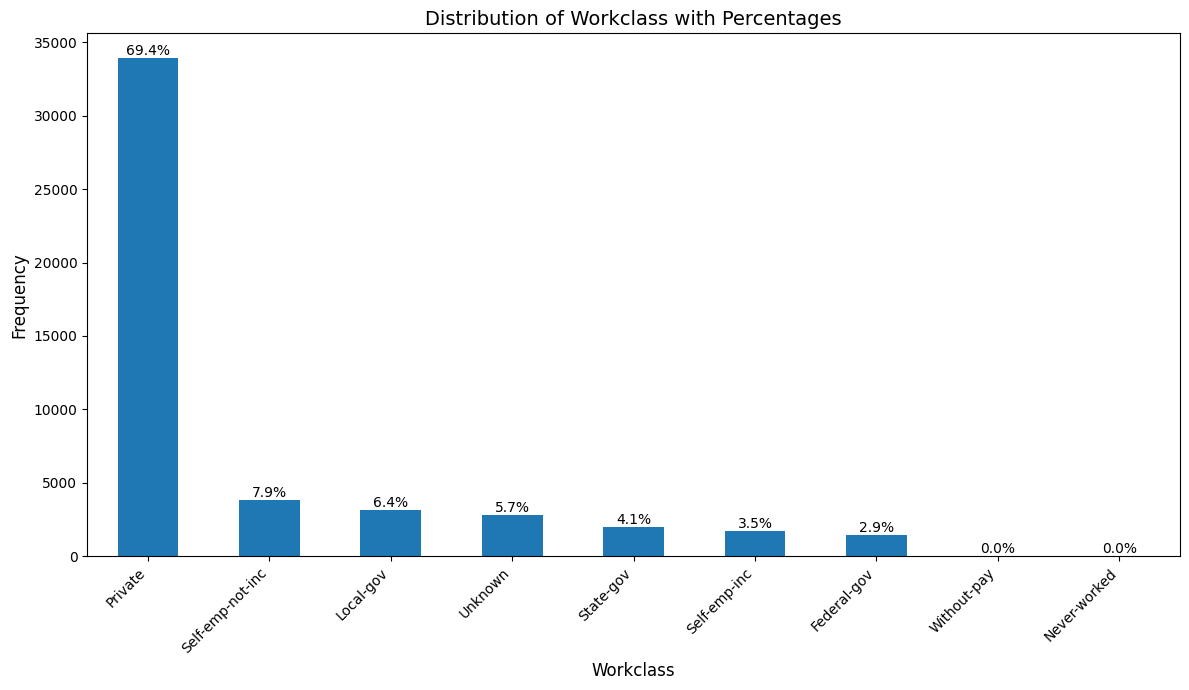

In [7]:
plt.figure(figsize=(12, 7))
ax = df['workclass'].value_counts().plot(kind='bar') # Get the axes object

plt.title('Distribution of Workclass with Percentages', fontsize=14)
plt.xlabel('Workclass', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Calculate percentages
total = len(df['workclass'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Here we can see that nearly 70% of this sample works in the private sector, which is not surprising, due to private businesses accounting for most employment opportunities. We will make bins that combine the self employed categories and the government categories to be used in modelling.

In [8]:
# Define the mapping for combining workclass categories
workclass_mapping = {
    'Self-emp-not-inc': 'Self-employed',
    'Self-emp-inc': 'Self-employed',
    'State-gov': 'Government',
    'Federal-gov': 'Government',
    'Local-gov': 'Government',
    'Private': 'Private',
    'Without-pay': 'Without-pay',
    'Never-worked': 'Never-worked',
    'Unknown': 'Unknown' # Assuming '?' is handled as 'Unknown' from previous cleaning
}

# Create the new binned workclass column
df['workclass_binned'] = df['workclass'].replace(workclass_mapping)

# Display the value counts of the new column to verify the changes
display(df['workclass_binned'].value_counts())

,count
workclass_binned,
Private,33906
Government,6549
Self-employed,5557
Unknown,2799
Without-pay,21
Never-worked,10


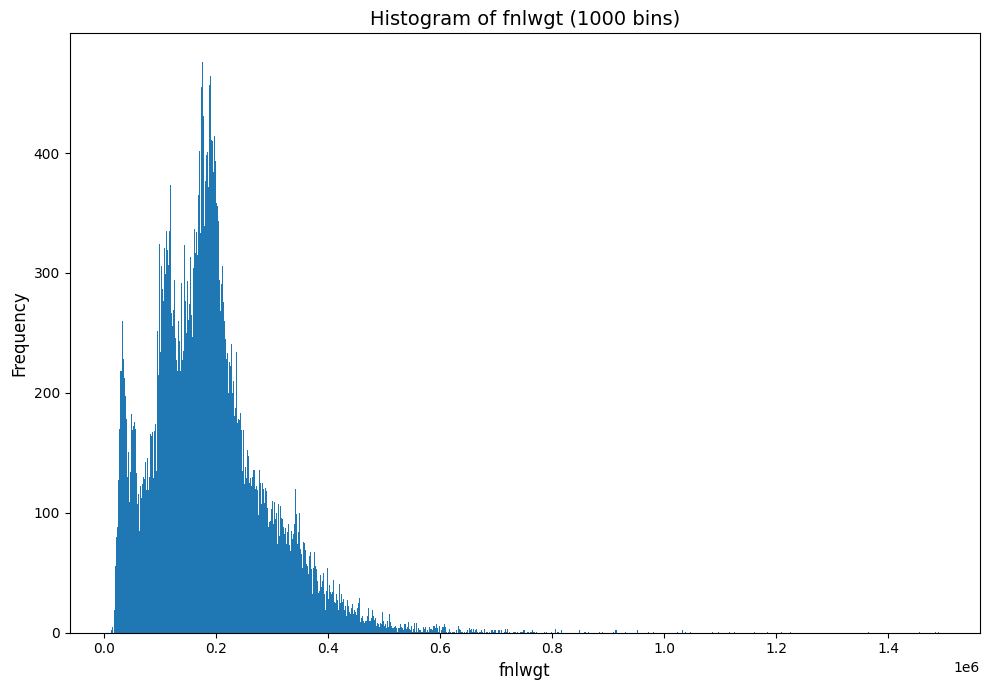

In [9]:
plt.figure(figsize=(10, 7))
plt.hist(df['fnlwgt'], bins=1000)
plt.title('Histogram of fnlwgt (1000 bins)', fontsize=14)
plt.xlabel('fnlwgt', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

fnlwgt is a sampling weight assigned by the U.S. Census Bureau. It indicates how many people in the U.S. population that specific record or individual is meant to represent. It will most likely not be useful for our model and may even hinder its performance, but we will leave it for now.

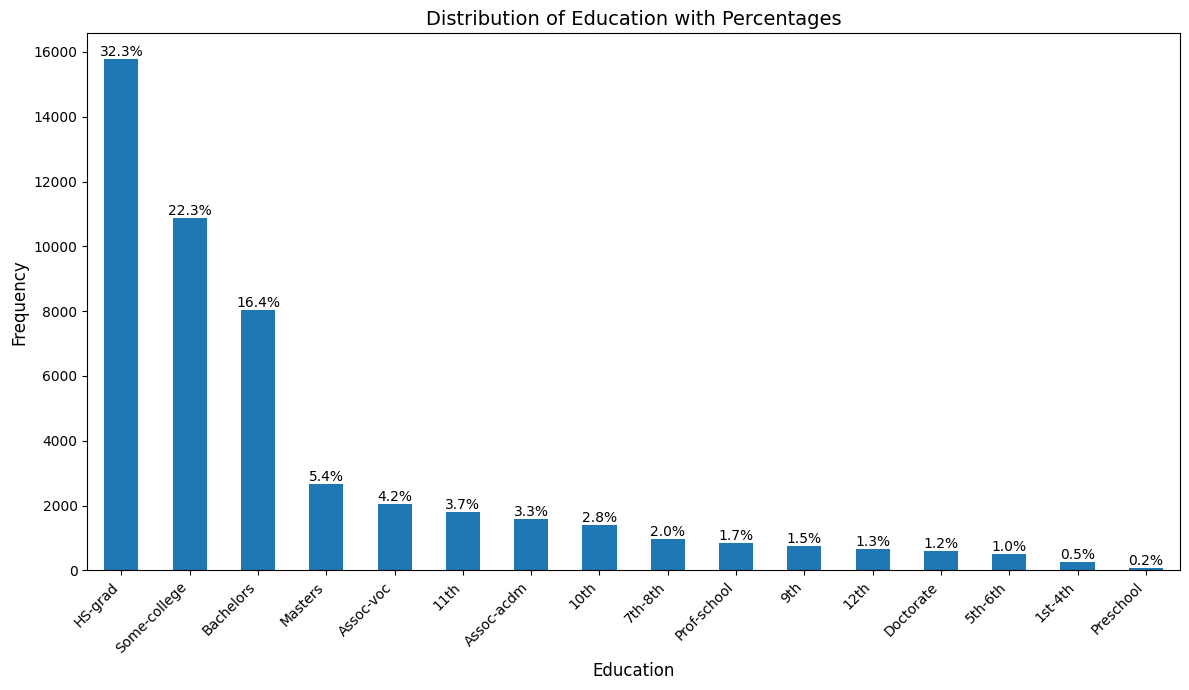

In [10]:
plt.figure(figsize=(12, 7))
ax = df['education'].value_counts().plot(kind='bar') # Get the axes object

plt.title('Distribution of Education with Percentages', fontsize=14)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Calculate percentages
total = len(df['education'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Here we can see what looks like a pretty accurate representation of the US populations education with a almost a third no longer continuing education after highschool which makes sense that this is the largest population as it is quite difficult to get even a minimum wage job without HS graduation or a G.E.D.
Everything else seems pretty normal here. Looking up ahead at the education num column, we may decide to go ahead with that, as it can be used as a more continuous variable which may prove more helpful with certain models.

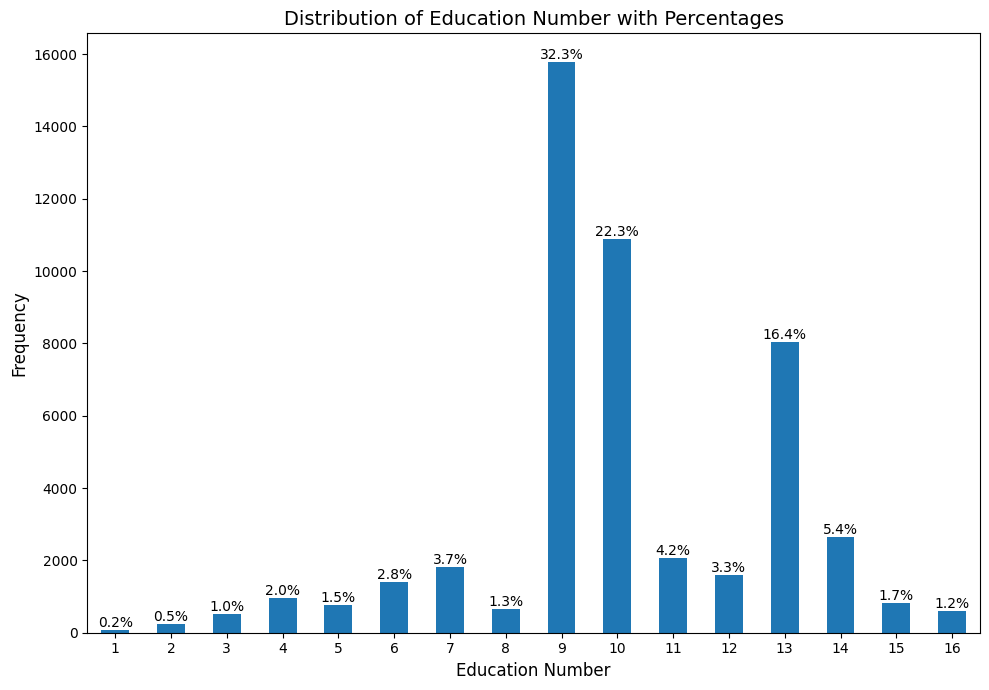

In [11]:
plt.figure(figsize=(10, 7))
ax = df['education-num'].value_counts().sort_index().plot(kind='bar') # Get the axes object

plt.title('Distribution of Education Number with Percentages', fontsize=14)
plt.xlabel('Education Number', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0) # Keep labels horizontal as there are not too many

# Calculate percentages
total = len(df['education-num'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Comparing the two plots, we can see that the number corresponds to the order from lowest education level to highest and that the percentage representation is the same for both plots, so we can confirm that this column is effectively a numerical representation of the education column.

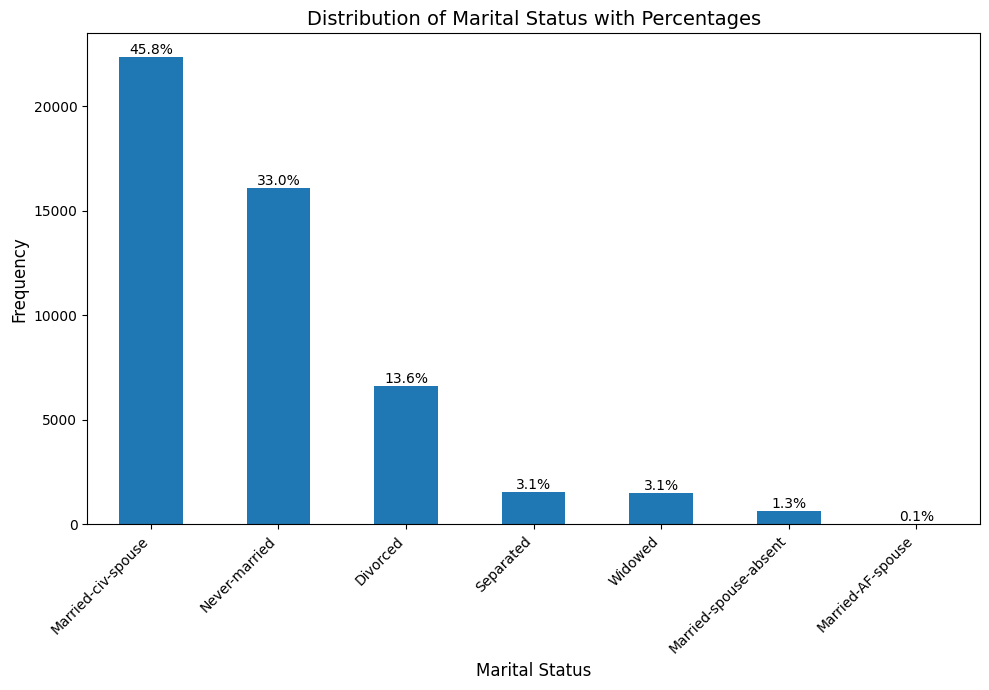

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
ax = df['marital-status'].value_counts().plot(kind='bar') # Get the axes object

plt.title('Distribution of Marital Status with Percentages', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Calculate percentages
total = len(df['marital-status'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

We can see that nearly half of the sample is married, a third has never been married, and 13.6% has been divorced. I would imagine that the effect of marriage is more likely to be a positive influence on income being above 50K due to people who get married being more likely to only want to do so given they are financially stable which I think will overpower the effect of marriage creating a lot of cases where only one of the two married parties is working and providing a wage.

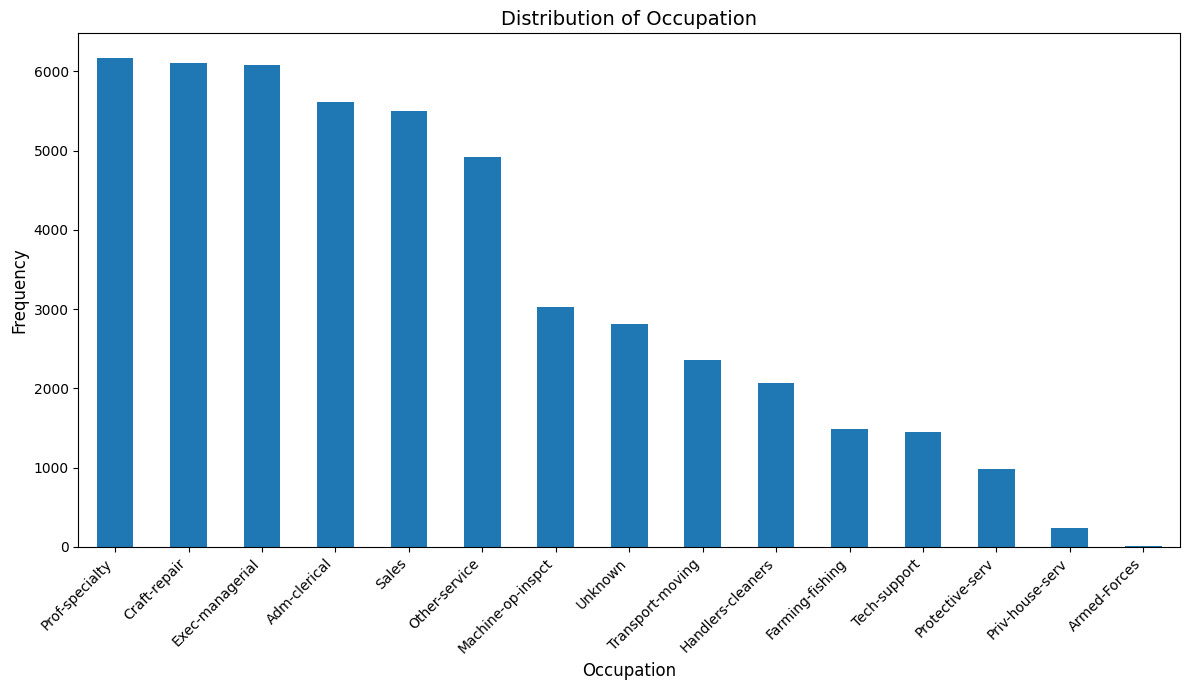

In [13]:
plt.figure(figsize=(12, 7))
df['occupation'].value_counts().plot(kind='bar')
plt.title('Distribution of Occupation', fontsize=14)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

These categories seem pretty well made and distinct from each other so I don't really see much room for binning here. I am curious to see how they correlate with our other column values and income.

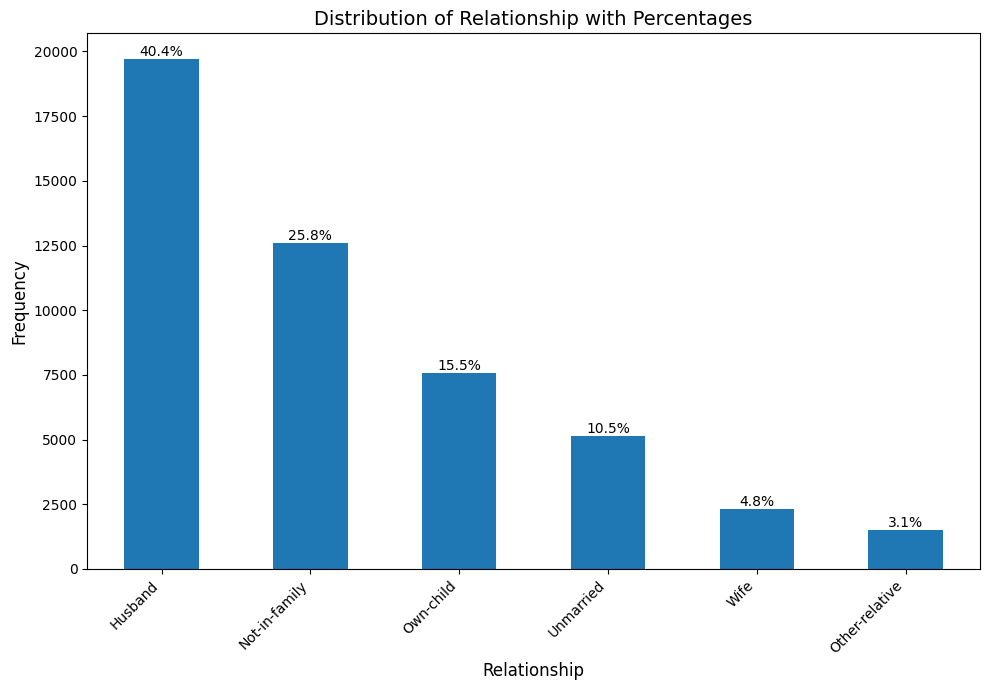

In [14]:
plt.figure(figsize=(10, 7))
ax = df['relationship'].value_counts().plot(kind='bar') # Get the axes object

plt.title('Distribution of Relationship with Percentages', fontsize=14)
plt.xlabel('Relationship', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Calculate percentages
total = len(df['relationship'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Here we can see that 40% of the sample is clasified as a husband, yet less than 5% of the sample are wives, meaning we either have a disproportionate amount of men in this sample to women, or there are much more married men in the sample than their are women. We will explore this in the sex column.

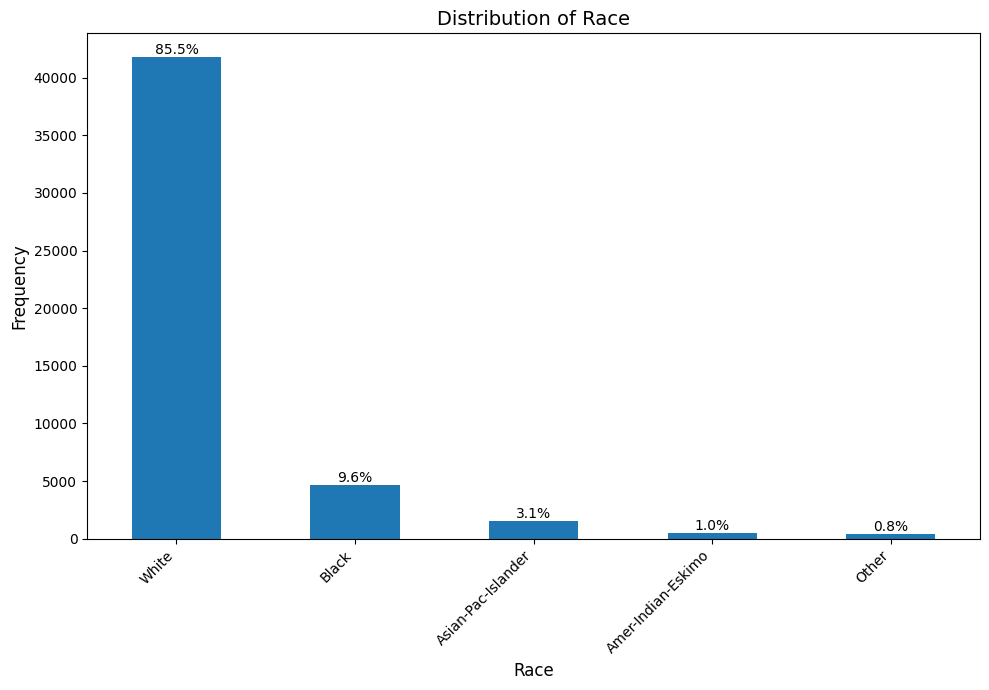

In [15]:
plt.figure(figsize=(10, 7))
ax = df['race'].value_counts().plot(kind='bar') # Get the axes object

plt.title('Distribution of Race', fontsize=14)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Calculate percentages
total = len(df['race'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Here we can see that the vast majority of americans are white, with the second most being black. Not much to discuss here in terms of binning, but it will be very interesting to see if there are racial differences on average for income or if it correlates with any of our other variables.

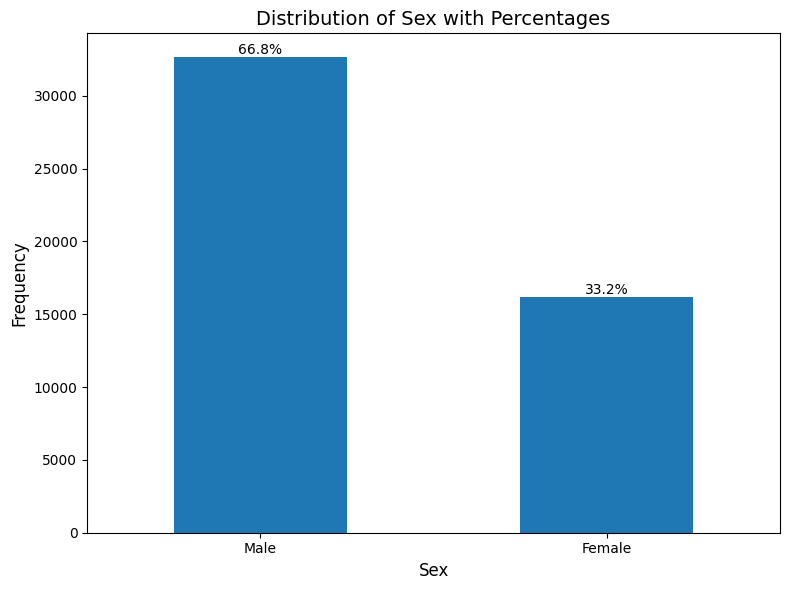

In [16]:
plt.figure(figsize=(8, 6))
ax = df['sex'].value_counts().plot(kind='bar') # Get the axes object

plt.title('Distribution of Sex with Percentages', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0) # Keep labels horizontal as there are only two categories

# Calculate percentages
total = len(df['sex'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Our initial guess was correct for the relationships column. The sample disproportionately represents males at twice the amount of females, compared to what should be very close to 50% for both across most populations globally given a decent enough sample size.

<Figure size 800x600 with 0 Axes>

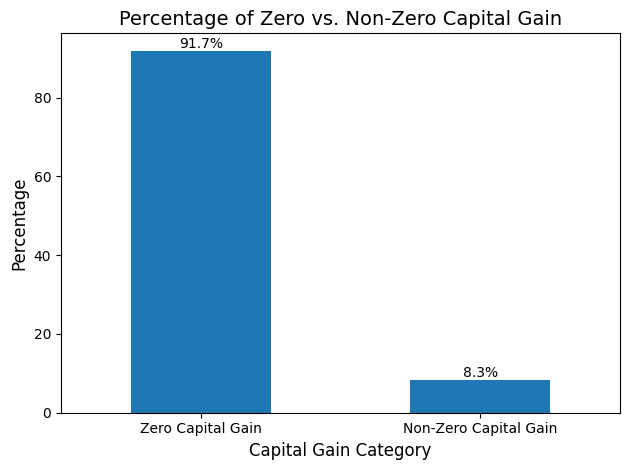

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the count of zero and non-zero capital gain values
zero_capital_gain_count = df[df['capital-gain'] == 0].shape[0]
non_zero_capital_gain_count = df[df['capital-gain'] > 0].shape[0]

# Calculate the percentages
total_count = len(df['capital-gain'])
zero_percentage = (zero_capital_gain_count / total_count) * 100
non_zero_percentage = (non_zero_capital_gain_count / total_count) * 100

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': ['Zero Capital Gain', 'Non-Zero Capital Gain'],
    'Percentage': [zero_percentage, non_zero_percentage]
})

plt.figure(figsize=(8, 6))
ax = plot_data.plot(kind='bar', x='Category', y='Percentage', legend=False)

plt.title('Percentage of Zero vs. Non-Zero Capital Gain', fontsize=14)
plt.xlabel('Capital Gain Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0) # Keep labels horizontal

# Add percentage labels above the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

We can see that over 90% of the sample has zero capital gains which makes sense as very few people invest in the stock market, let alone even have savings. I suspect we will have one of the highest correlations of variables with this capital gain value and the income being over 50K, due to the variable itself being considered part of the income. We will also go ahead and create an engineered column which specifies whether or not the individual had capital gains or not, and see if how it does with our models.

In [18]:
# Create a binary column for capital gain (1 if capital-gain > 0, 0 otherwise)
df['has_capital_gain'] = (df['capital-gain'] > 0).astype(int)

# Display the value counts of the new column to verify the changes
display(df['has_capital_gain'].value_counts())

,count
has_capital_gain,
0,44807
1,4035


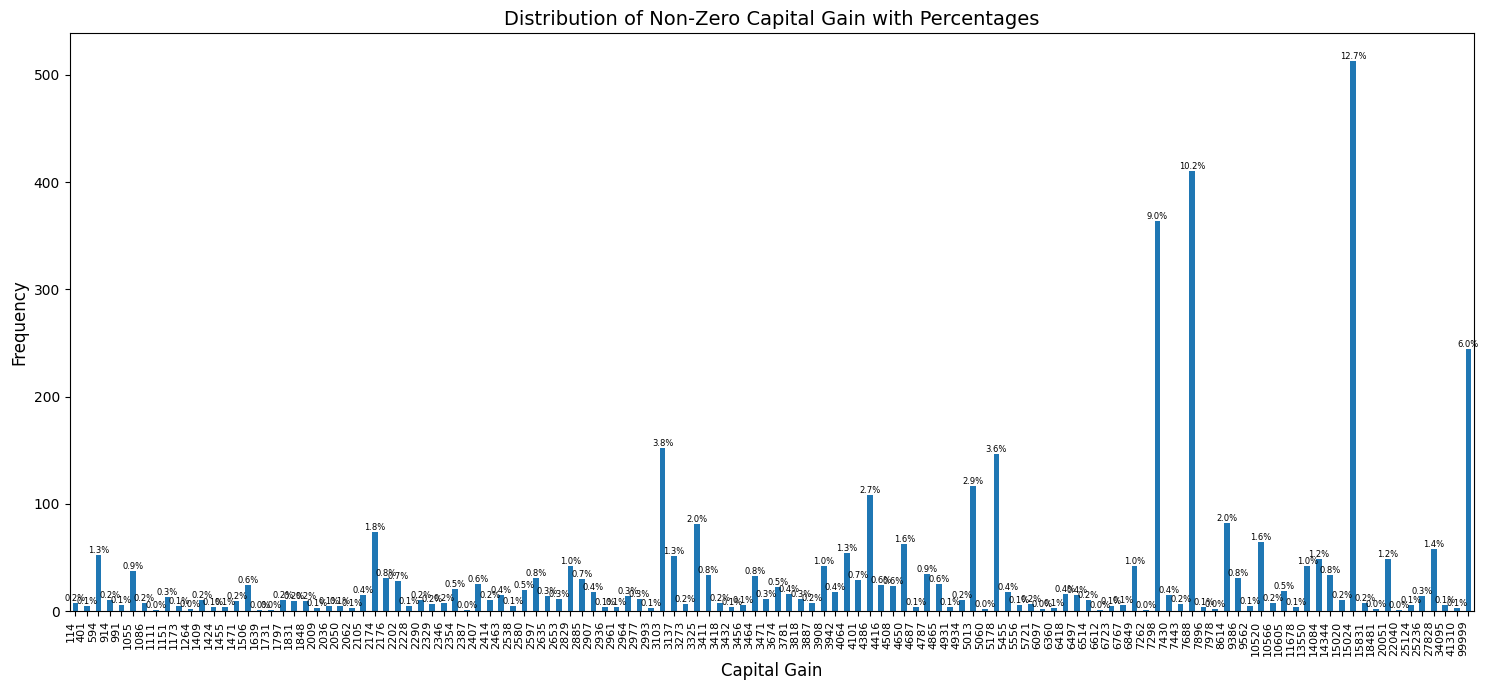

In [19]:
# Filter for non-zero capital gain values
non_zero_capital_gain_df = df[df['capital-gain'] > 0].copy()

plt.figure(figsize=(15, 7)) # Increase figure size due to many unique values
ax = non_zero_capital_gain_df['capital-gain'].value_counts().sort_index().plot(kind='bar') # Get the axes object

plt.title('Distribution of Non-Zero Capital Gain with Percentages', fontsize=14)
plt.xlabel('Capital Gain', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=8) # Rotate labels and reduce font size for better readability

# Calculate percentages and annotate only if frequency is greater than 0
total_non_zero = len(non_zero_capital_gain_df)
for p in ax.patches:
    height = p.get_height()
    if height > 0 and total_non_zero > 0: # Ensure there are non-zero values before calculating percentage
        percentage = '{:.1f}%'.format(100 * height / total_non_zero)
        x = p.get_x() + p.get_width() / 2.
        y = height
        # Adjust vertical alignment for better placement with rotated labels
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=6) # Further reduced font size


plt.tight_layout()
plt.show()

In [20]:
import numpy as np

unique_capital_gain_values = df['capital-gain'].unique()

print("Unique values for Capital Gain:")
print(np.sort(unique_capital_gain_values)) # Sort for better readability

Unique values for Capital Gain:
[    0   114   401   594   914   991  1055  1086  1111  1151  1173  1264
  1409  1424  1455  1471  1506  1639  1731  1797  1831  1848  2009  2036
  2050  2062  2105  2174  2176  2202  2228  2290  2329  2346  2354  2387
  2407  2414  2463  2538  2580  2597  2635  2653  2829  2885  2907  2936
  2961  2964  2977  2993  3103  3137  3273  3325  3411  3418  3432  3456
  3464  3471  3674  3781  3818  3887  3908  3942  4064  4101  4386  4416
  4508  4650  4687  4787  4865  4931  4934  5013  5060  5178  5455  5556
  5721  6097  6360  6418  6497  6514  6612  6723  6767  6849  7262  7298
  7430  7443  7688  7896  7978  8614  9386  9562 10520 10566 10605 11678
 13550 14084 14344 15020 15024 15831 18481 20051 22040 25124 25236 27828
 34095 41310 99999]


Looking at the unique values for capital gains, I think it would be best if we did bins per 10K of income, as this will prevent us from having too many bins while not having too much data in each bin.

In [21]:
import pandas as pd
import numpy as np

# Get the min and max capital gain values
min_capital_gain = df['capital-gain'].min()
max_capital_gain = df['capital-gain'].max()

# Define the bin edges for every 10,000
# Start from 0 (or min_capital_gain if it's negative, but capital-gain is typically non-negative)
# Go up to max_capital_gain, ensuring the last bin includes max_capital_gain
bins_capital_gain = np.arange(0, max_capital_gain + 10001, 10000)

# Create labels for the bins
labels_capital_gain = [f'{int(bins_capital_gain[i])}-{int(bins_capital_gain[i+1])-1}' for i in range(len(bins_capital_gain)-1)]

# Create the new binned capital gain column
# Use right=False to make bins like [0-9999], [10000-19999], etc.
# include_lowest=True to include the minimum value (0) in the first bin
df['capital_gain_10k_bins'] = pd.cut(df['capital-gain'], bins=bins_capital_gain, right=False, labels=labels_capital_gain, include_lowest=True)

# Display the value counts of the new column to verify the changes
display(df[['capital-gain', 'capital_gain_10k_bins']].head())
display(df['capital_gain_10k_bins'].value_counts().sort_index())

,capital-gain,capital_gain_10k_bins
0,2174,0-9999
1,0,0-9999
2,0,0-9999
3,0,0-9999
4,0,0-9999


,count
capital_gain_10k_bins,
0-9999,47708
10000-19999,753
20000-29999,128
30000-39999,6
40000-49999,3
50000-59999,0
60000-69999,0
70000-79999,0
80000-89999,0


This binning looks like it will appear useful, as we know for a fact that all 244 individuals in the largest bracket by definition will have greater than 50K income, and there will most likely be a higher probablity that the individuals in the 10K-20K and 20K-30K brackets will have a higher than 50K income due to that most likely being not enough to live off of, meaning their main occupation income would set them over the 50K amount.

In [22]:
unique_capital_loss_values = df['capital-loss'].unique()

print("Unique values for Capital Loss:")
print(np.sort(unique_capital_loss_values)) # Sort for better readability

Unique values for Capital Loss:
[   0  155  213  323  419  625  653  810  880  974 1092 1138 1258 1340
 1380 1408 1411 1421 1429 1485 1504 1510 1539 1564 1573 1579 1590 1594
 1602 1617 1628 1648 1651 1668 1669 1672 1719 1721 1726 1735 1740 1741
 1755 1762 1816 1825 1844 1848 1870 1876 1887 1902 1911 1944 1974 1977
 1980 2001 2002 2042 2051 2057 2080 2129 2149 2163 2174 2179 2201 2205
 2206 2231 2238 2246 2258 2267 2282 2339 2352 2377 2392 2415 2444 2457
 2465 2467 2472 2489 2547 2559 2603 2754 2824 3004 3175 3683 3770 3900
 4356]


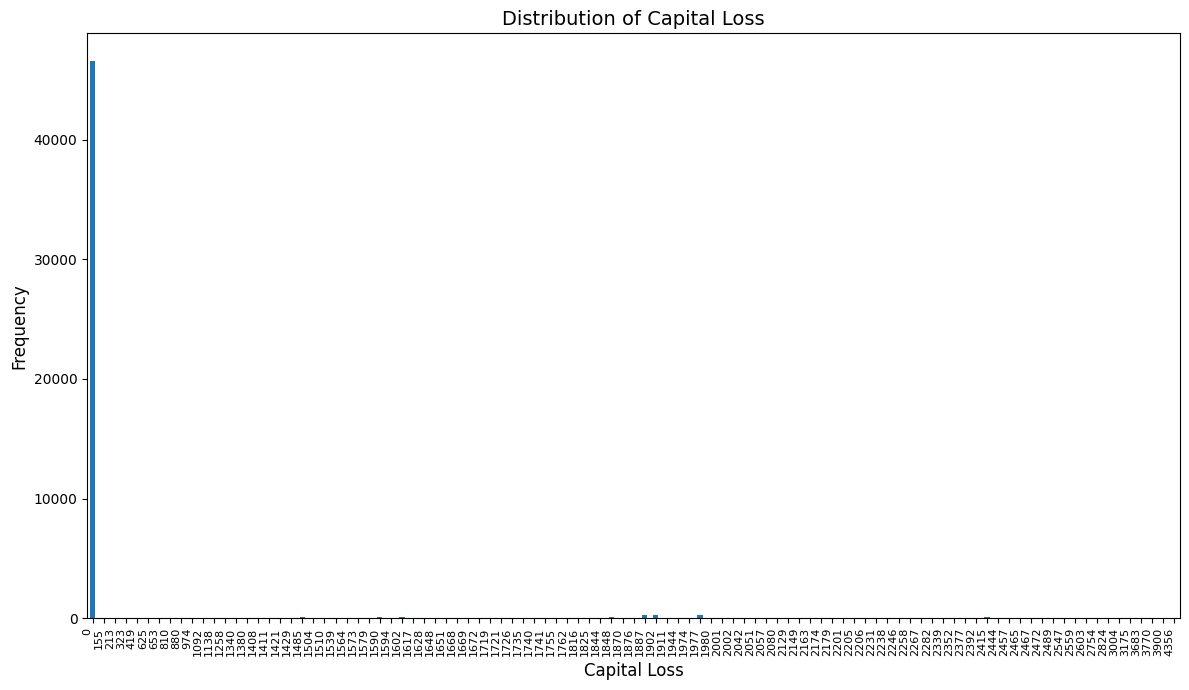

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
df['capital-loss'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Capital Loss', fontsize=14)
plt.xlabel('Capital Loss', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=8) # Rotate labels and reduce font size for better readability
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

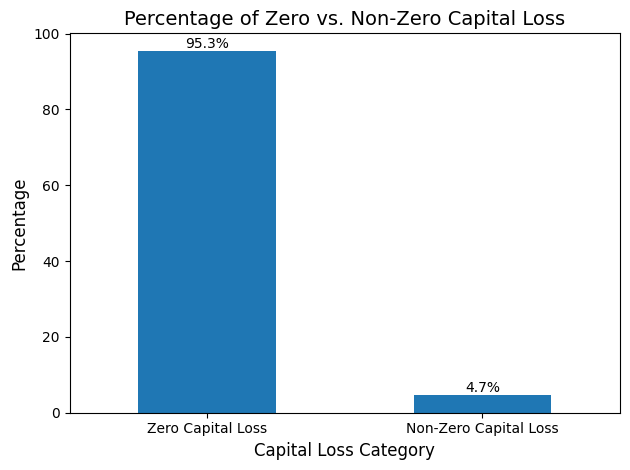

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the count of zero and non-zero capital loss values
zero_capital_loss_count = df[df['capital-loss'] == 0].shape[0]
non_zero_capital_loss_count = df[df['capital-loss'] > 0].shape[0]

# Calculate the percentages
total_count = len(df['capital-loss'])
zero_percentage = (zero_capital_loss_count / total_count) * 100
non_zero_percentage = (non_zero_capital_loss_count / total_count) * 100

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': ['Zero Capital Loss', 'Non-Zero Capital Loss'],
    'Percentage': [zero_percentage, non_zero_percentage]
})

plt.figure(figsize=(8, 6))
ax = plot_data.plot(kind='bar', x='Category', y='Percentage', legend=False)

plt.title('Percentage of Zero vs. Non-Zero Capital Loss', fontsize=14)
plt.xlabel('Capital Loss Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0) # Keep labels horizontal

# Add percentage labels above the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

What we can take from this, once again, is that a large majority of people don't mess with the stock market, but even less of our sample invests in the stock market and loses. By definition, a capital loss is when an individual sells stock for less than they bought it for. I would imagine that most of these cases are people who put money in the stock market, and soon needed the money, which would leave me to believe that having capital losses at all is more likely to correlate with below 50K income.

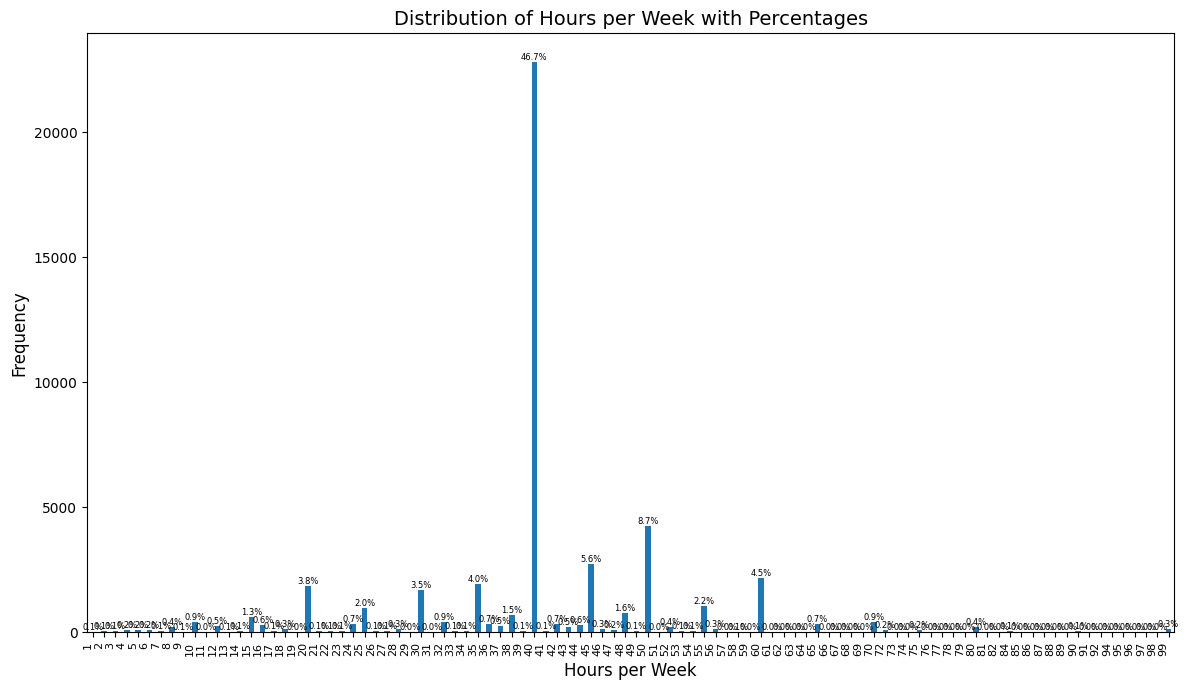

In [25]:
plt.figure(figsize=(12, 7))
ax = df['hours-per-week'].value_counts().sort_index().plot(kind='bar') # Get the axes object

plt.title('Distribution of Hours per Week with Percentages', fontsize=14)
plt.xlabel('Hours per Week', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=8) # Rotate labels and reduce font size for better readability

# Calculate percentages and annotate only if frequency is greater than 0
total = len(df['hours-per-week'])
for p in ax.patches:
    height = p.get_height()
    if height > 0: # Only annotate if the frequency is greater than 0
        percentage = '{:.1f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2.
        y = height
        # Adjust vertical alignment for better placement with rotated labels
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=6) # Further reduced font size


plt.tight_layout()
plt.show()

Here we can see that nearly half of the sample works 40 hours per week, which is standard full time working hours, 8 hours a day 5 days a week. It may prove useful for the model to create a second column denoting the individual as part time, full time, or overtime, to simplify the input for this column.

In [26]:
import pandas as pd

# Define the function to categorize hours per week
def categorize_hours(hours):
    if hours < 40:
        return 'Part-time'
    elif hours == 40:
        return 'Full-time'
    else:
        return 'Overtime'

# Apply the function to create the new column
df['work_schedule'] = df['hours-per-week'].apply(categorize_hours)

# Display the value counts of the new column to verify the changes
display(df['work_schedule'].value_counts())

,count
work_schedule,
Full-time,22803
Overtime,14352
Part-time,11687


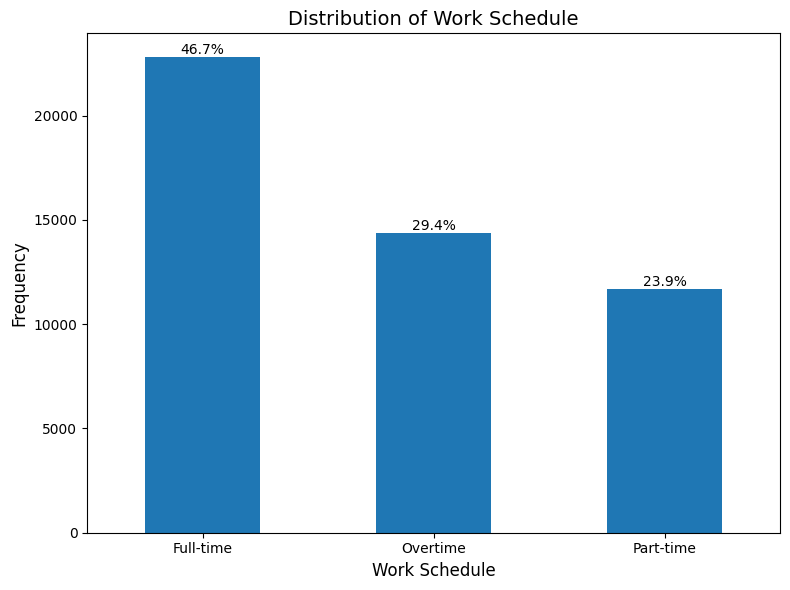

In [27]:
plt.figure(figsize=(8, 6))
ax = df['work_schedule'].value_counts().plot(kind='bar') # Get the axes object

plt.title('Distribution of Work Schedule', fontsize=14)
plt.xlabel('Work Schedule', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0) # Keep labels horizontal as there are only three categories

# Calculate percentages
total = len(df['work_schedule'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

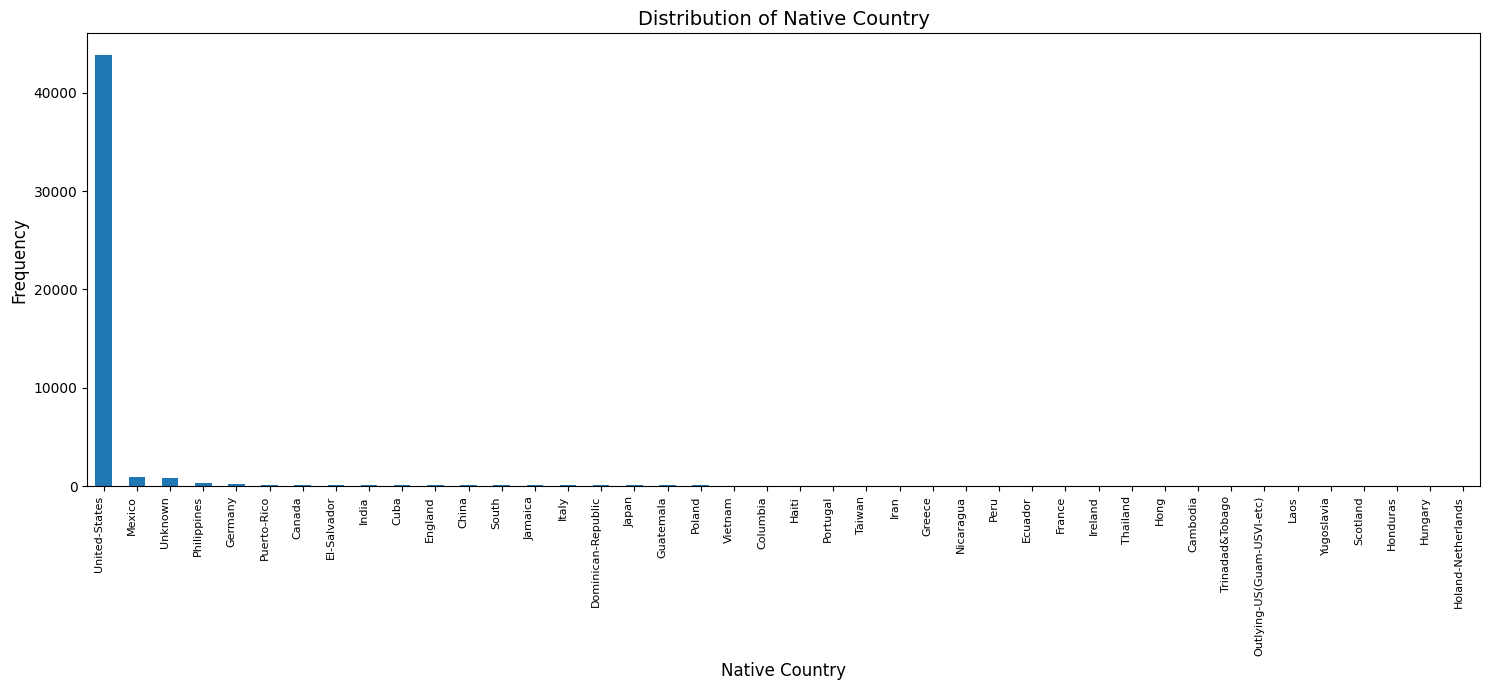

In [28]:
plt.figure(figsize=(15, 7)) # Increased figure size for better readability with many categories
df['native-country'].value_counts().plot(kind='bar')
plt.title('Distribution of Native Country', fontsize=14)
plt.xlabel('Native Country', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=8) # Rotate labels and reduce font size for better readability
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

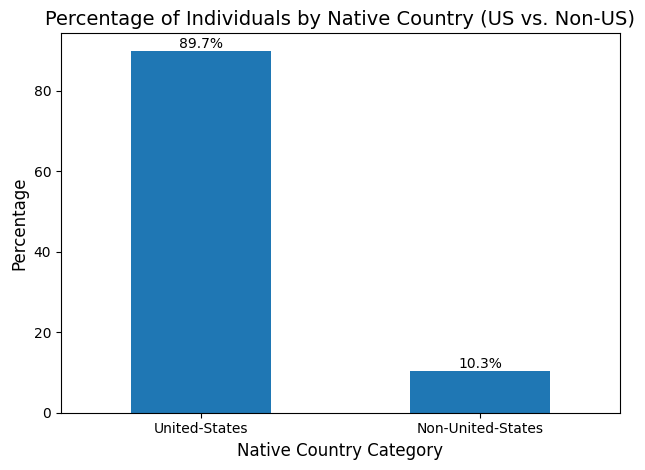

In [29]:
# Categorize native country as US or Non-US
df['native_country_grouped'] = df['native-country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Non-United-States')

# Calculate the count of each category
country_counts = df['native_country_grouped'].value_counts()

# Calculate the percentages
total_count = len(df['native_country_grouped'])
us_percentage = (country_counts.get('United-States', 0) / total_count) * 100
non_us_percentage = (country_counts.get('Non-United-States', 0) / total_count) * 100

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': ['United-States', 'Non-United-States'],
    'Percentage': [us_percentage, non_us_percentage]
})

plt.figure(figsize=(8, 6))
ax = plot_data.plot(kind='bar', x='Category', y='Percentage', legend=False)

plt.title('Percentage of Individuals by Native Country (US vs. Non-US)', fontsize=14)
plt.xlabel('Native Country Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0) # Keep labels horizontal

# Add percentage labels above the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Here we can see about 90% of the sample is from US, so it will be interesting to see if being out of the US will result in a higher or lower rate of 50K+ incomes. We will make a new binary column based on this column.

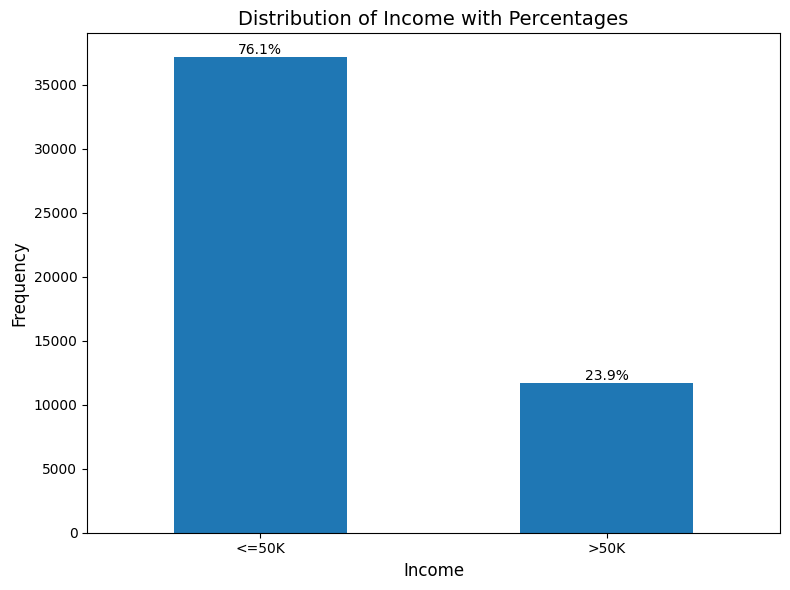

In [30]:
plt.figure(figsize=(8, 6))
ax = df['income'].value_counts().plot(kind='bar') # Get the axes object

plt.title('Distribution of Income with Percentages', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0) # Keep labels horizontal as there are only two categories

# Calculate percentages
total = len(df['income'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

About 3/4 of our population makes less than 50K a year. Now, its time to see how our columns interact with each other and if we can make any conclusions based on our findings.

In [31]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'has_capital_gain']
Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income', 'workclass_binned', 'work_schedule', 'native_country_grouped']


In [32]:
# Select only the categorical columns from the DataFrame df
categorical_df = df[categorical_cols]

# Apply one-hot encoding to the selected categorical columns
categorical_df_encoded = pd.get_dummies(categorical_df)

# Select only the numerical columns from the DataFrame df
numerical_df = df[numerical_cols]

# Concatenate the one-hot encoded DataFrame with the original numerical columns
df_encoded = pd.concat([numerical_df, categorical_df_encoded], axis=1)

# Display the first few rows of the new encoded DataFrame and its info to verify
display(df_encoded.head())
display(df_encoded.info())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,has_capital_gain,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,workclass_binned_Never-worked,workclass_binned_Private,workclass_binned_Self-employed,workclass_binned_Unknown,workclass_binned_Without-pay,work_schedule_Full-time,work_schedule_Overtime,work_schedule_Part-time,native_country_grouped_Non-United-States,native_country_grouped_United-States
0,39,77516,13,2174,0,40,1,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,True,False,False,False,False,True,False,True
2,38,215646,9,0,0,40,0,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,53,234721,7,0,0,40,0,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,28,338409,13,0,0,40,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 122 entries, age to native_country_grouped_United-States
dtypes: bool(115), int64(7)
memory usage: 8.0 MB


None

In [33]:
correlation_matrix = df_encoded.corr()
display(correlation_matrix.head())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,has_capital_gain,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,workclass_binned_Never-worked,workclass_binned_Private,workclass_binned_Self-employed,workclass_binned_Unknown,workclass_binned_Without-pay,work_schedule_Full-time,work_schedule_Overtime,work_schedule_Part-time,native_country_grouped_Non-United-States,native_country_grouped_United-States
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.119816,0.049867,0.057935,-0.019564,...,-0.019564,-0.191263,0.178528,0.026931,0.013073,-0.001367,0.070579,-0.073758,-0.011888,0.011888
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.007566,-0.009996,0.001233,0.003438,...,0.003438,0.042875,-0.044260,-0.005625,-0.004274,0.029268,-0.027680,-0.004671,0.070645,-0.070645
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.115100,0.058072,0.097210,-0.014350,...,-0.014350,-0.118599,0.060443,-0.079304,-0.009081,-0.075321,0.176596,-0.100471,-0.104210,0.104210
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.482537,-0.003633,-0.009872,-0.002072,...,-0.002072,-0.036986,0.082933,-0.019062,-0.002098,-0.041478,0.084777,-0.042012,-0.004191,0.004191
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,-0.065157,0.009221,0.009504,-0.003107,...,-0.003107,-0.025176,0.034846,-0.012155,0.000121,-0.017431,0.058331,-0.041896,-0.009449,0.009449


## Plot the correlation heatmap

### Subtask:
Visualize the correlation matrix as a heatmap for better understanding of relationships between variables.


**Reasoning**:
Visualize the correlation matrix as a heatmap for better understanding of relationships between variables.



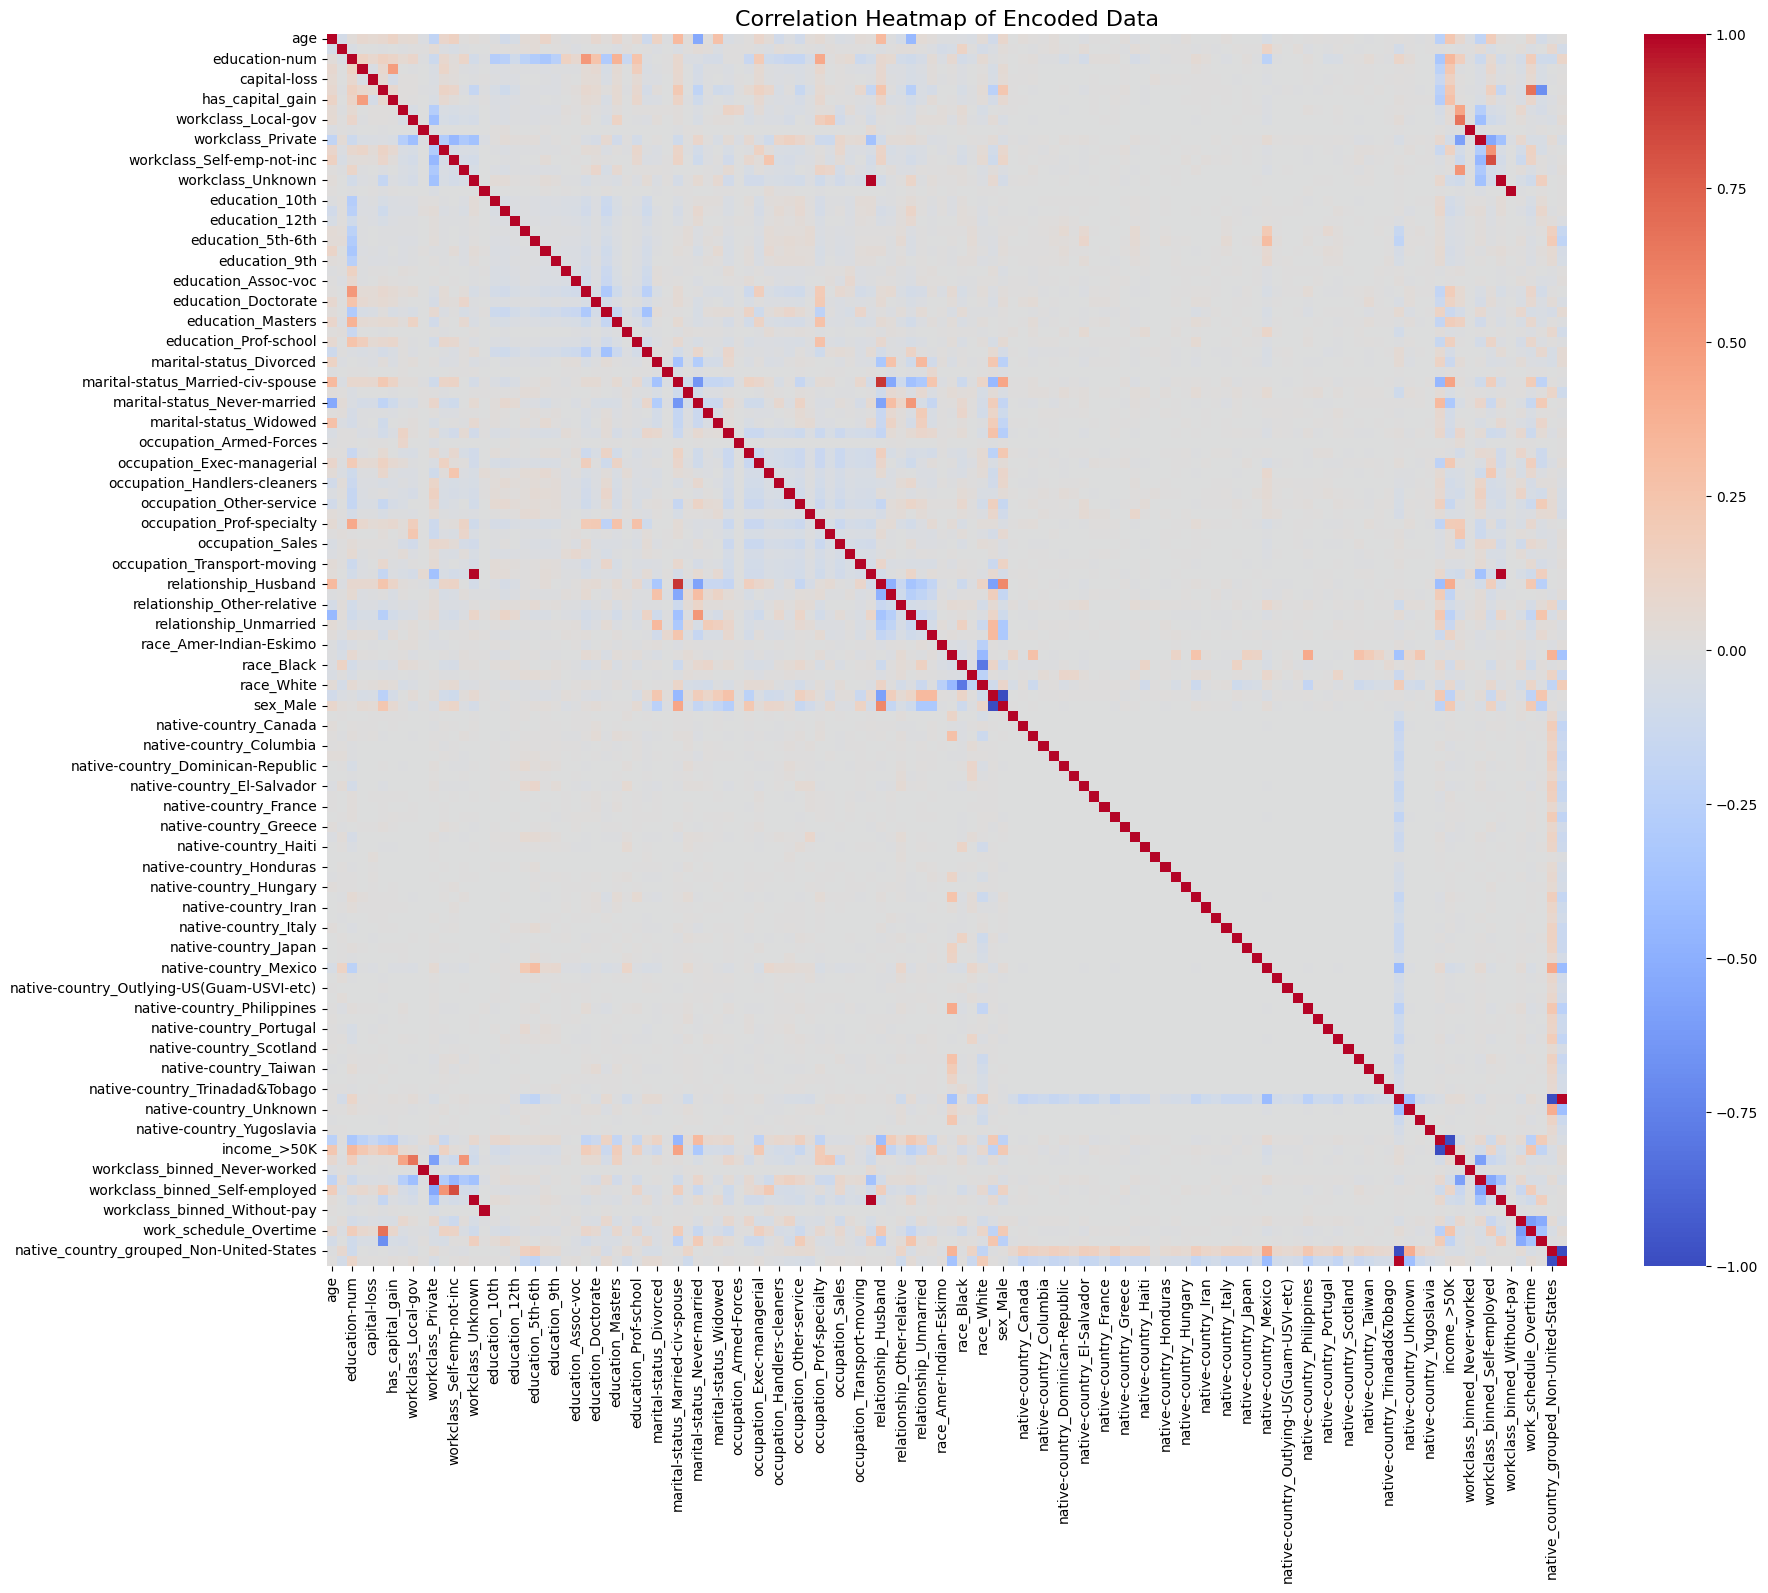

In [34]:
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False) # annot=False to avoid clutter with many columns
plt.title('Correlation Heatmap of Encoded Data', fontsize=16)
plt.show()

In [35]:
# Get the correlation matrix (assuming it's already calculated and stored in correlation_matrix)
# If not, you would need to calculate it first:
# correlation_matrix = df_encoded.corr()

# Find pairs of columns with correlation greater than 0.25 or less than -0.25 (excluding perfect correlations of 1.0 and -1.0)
strong_correlations = correlation_matrix[((correlation_matrix > 0.25) | (correlation_matrix < -0.25)) & (abs(correlation_matrix) != 1.0)]

# Get the pairs of columns
# Stack the strong_correlations matrix and reset index to get pairs as rows
stacked_correlations = strong_correlations.stack().reset_index()
stacked_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove duplicate reversed pairs
# Create a temporary column with sorted variable names
stacked_correlations['Pair'] = stacked_correlations.apply(lambda row: tuple(sorted((row['Variable 1'], row['Variable 2']))), axis=1)
# Drop duplicates based on the 'Pair' column
stacked_correlations = stacked_correlations.drop_duplicates(subset=['Pair']).drop('Pair', axis=1)


# Order the DataFrame by the 'Correlation' column from greatest to least
stacked_correlations = stacked_correlations.sort_values(by='Correlation', ascending=False)

# Display the resulting DataFrame
display(stacked_correlations)

,Variable 1,Variable 2,Correlation
49,workclass_Unknown,occupation_Unknown,0.998110
99,occupation_Unknown,workclass_binned_Unknown,0.998110
74,marital-status_Married-civ-spouse,relationship_Husband,0.893676
44,workclass_Self-emp-not-inc,workclass_binned_Self-employed,0.817796
18,hours-per-week,work_schedule_Overtime,0.672626
...,...,...,...
137,race_Black,race_White,-0.791096
213,native_country_grouped_Non-United-States,native_country_grouped_United-States,-1.000000
163,native-country_United-States,native_country_grouped_Non-United-States,-1.000000
145,sex_Female,sex_Male,-1.000000


Some interesting correlations between our variables here, disregarding our correlations for variables that are mutually exclusive:
*   Age negatively correlates with being never married at a Pearson coefficient of .53 and also negatively correlates with being a child in a household with a value of .43 -nothing special here, these make sense logically.



Now lets see any correlations with our target variable, income:
*   Being a Married-civ-spouse has a .44 coefficient with	income greater than 50K
*   Education number has a .33 correlation with income being over 50K which makes sense, more education means more eligibility for higher paying jobs.
*   Having any capital gains correlates by .26 with income greater than 50K
*   Husbands have a .4 correelation with making more than 50k
*   Being never married has .31 correlation with income greater than 50K
88	marital-status_Never-married	income_<=50K	0.31878175012120824



In [36]:
# Filter the stacked_correlations DataFrame for pairs involving 'income' or its one-hot encoded versions
income_correlations = stacked_correlations[
    stacked_correlations['Variable 1'].str.contains('income', case=False) |
    stacked_correlations['Variable 2'].str.contains('income', case=False)
]

# Display the filtered DataFrame
display(income_correlations)

,Variable 1,Variable 2,Correlation
81,marital-status_Married-civ-spouse,income_>50K,0.445853
110,relationship_Husband,income_>50K,0.403791
15,education-num,income_>50K,0.332613
88,marital-status_Never-married,income_<=50K,0.318782
22,has_capital_gain,income_>50K,0.265920
21,has_capital_gain,income_<=50K,-0.265920
89,marital-status_Never-married,income_>50K,-0.318782
14,education-num,income_<=50K,-0.332613
109,relationship_Husband,income_<=50K,-0.403791
80,marital-status_Married-civ-spouse,income_<=50K,-0.445853


In [37]:
X = df_encoded.drop('income_>50K', axis=1)
y = df_encoded['income_>50K']

display(X.head())
display(y.head())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,has_capital_gain,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,workclass_binned_Never-worked,workclass_binned_Private,workclass_binned_Self-employed,workclass_binned_Unknown,workclass_binned_Without-pay,work_schedule_Full-time,work_schedule_Overtime,work_schedule_Part-time,native_country_grouped_Non-United-States,native_country_grouped_United-States
0,39,77516,13,2174,0,40,1,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,True,False,False,False,False,True,False,True
2,38,215646,9,0,0,40,0,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,53,234721,7,0,0,40,0,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,28,338409,13,0,0,40,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


,income_>50K
0,False
1,False
2,False
3,False
4,False


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame for easier inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

display(X_scaled_df.head())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,has_capital_gain,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,workclass_binned_Never-worked,workclass_binned_Private,workclass_binned_Self-employed,workclass_binned_Unknown,workclass_binned_Without-pay,work_schedule_Full-time,work_schedule_Overtime,work_schedule_Part-time,native_country_grouped_Non-United-States,native_country_grouped_United-States
0,0.025996,-1.061979,1.136512,0.146932,-0.217127,-0.034087,3.332354,-0.173795,-0.26194,-0.01431,...,-0.01431,-1.506680,-0.358304,-0.246558,-0.02074,1.068602,-0.645074,-0.560845,-0.338083,0.338083
1,0.828308,-1.007104,1.136512,-0.144804,-0.217127,-2.213032,-0.300088,-0.173795,-0.26194,-0.01431,...,-0.01431,-1.506680,2.790927,-0.246558,-0.02074,-0.935802,-0.645074,1.783024,-0.338083,0.338083
2,-0.046942,0.246034,-0.419335,-0.144804,-0.217127,-0.034087,-0.300088,-0.173795,-0.26194,-0.01431,...,-0.01431,0.663711,-0.358304,-0.246558,-0.02074,1.068602,-0.645074,-0.560845,-0.338083,0.338083
3,1.047121,0.426663,-1.197259,-0.144804,-0.217127,-0.034087,-0.300088,-0.173795,-0.26194,-0.01431,...,-0.01431,0.663711,-0.358304,-0.246558,-0.02074,1.068602,-0.645074,-0.560845,-0.338083,0.338083
4,-0.776316,1.408530,1.136512,-0.144804,-0.217127,-0.034087,-0.300088,-0.173795,-0.26194,-0.01431,...,-0.01431,0.663711,-0.358304,-0.246558,-0.02074,1.068602,-0.645074,-0.560845,2.957854,-2.957854


In [39]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled_df)

PCA()

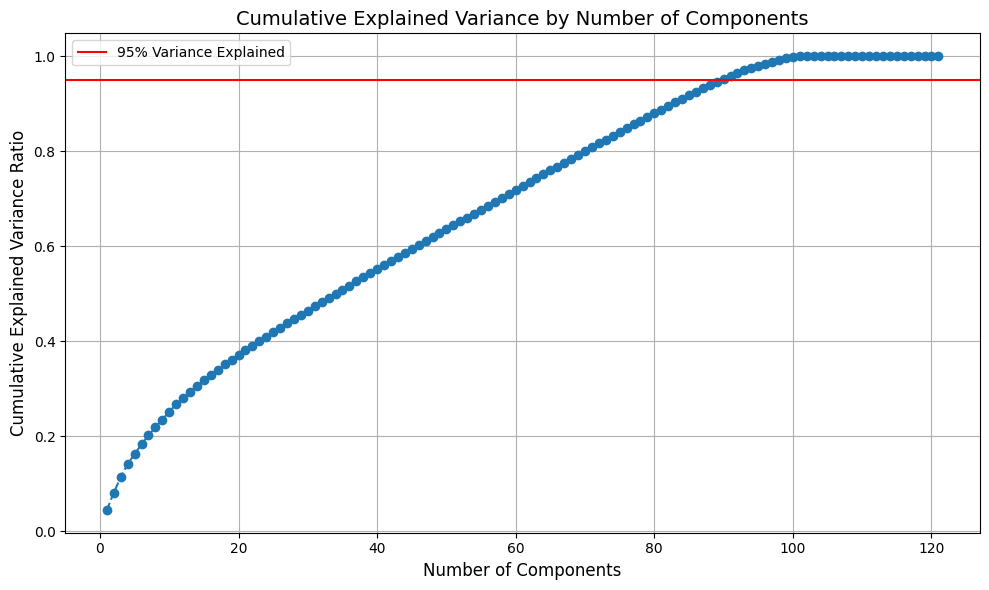

Number of components needed to explain 95% variance: 90


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=12)
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Explained') # Add a line for 95% variance
plt.legend()
plt.tight_layout()
plt.show()

# Find the number of components needed to explain 95% of the variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components needed to explain 95% variance: {n_components_95}")

Here we can see that by the PCA of our 120+ variables, we can likely get rid of 20+ redundant variables and still account for more than 95% of our variance.

In [41]:
from sklearn.decomposition import PCA

# Instantiate a new PCA object, specifying the number of components to keep (90)
pca_final = PCA(n_components=90)

# Transform the scaled feature data using the fitted PCA object
X_pca = pca_final.fit_transform(X_scaled_df)

# Convert the transformed data to a DataFrame for display
X_pca_df = pd.DataFrame(X_pca)

# Display the first few rows of the transformed data
display(X_pca_df.head())

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.444360,-1.834355,-1.634331,2.949722,-0.618535,-1.229302,2.089184,-0.625377,-0.639593,0.731295,...,1.042222,-0.285649,-1.299589,-0.073531,0.708772,-1.132214,0.829065,-0.052827,-1.430344,-0.955956
1,2.858348,-1.069916,-1.848137,-0.487430,0.405694,2.714026,0.798624,1.013372,0.079677,0.374939,...,-0.207040,-0.659486,0.014428,-0.283446,0.358358,-0.266712,-1.116498,-0.953558,0.136506,-0.669679
2,-1.056450,-0.269181,1.909282,-0.493983,-1.024567,-0.069818,-0.271508,-1.030322,-0.228633,-0.183300,...,-0.740230,-0.202278,-0.549154,0.784412,-0.308267,-0.071808,-0.230408,0.068983,-0.255617,0.140819
3,-0.032844,0.800230,1.465554,-1.750079,-2.018239,-1.842047,0.331423,0.280418,1.002869,-2.180090,...,-0.963181,-0.201049,-1.176369,0.685289,0.853861,0.232254,0.891881,0.122176,-0.813263,-0.514315
4,-1.498231,5.150296,-1.692007,3.119469,0.877267,-1.163398,-1.776816,0.989766,0.403662,0.534877,...,-2.806254,-0.104361,0.598709,-0.659623,1.060646,1.407461,1.681602,-1.834267,-2.146973,1.059644


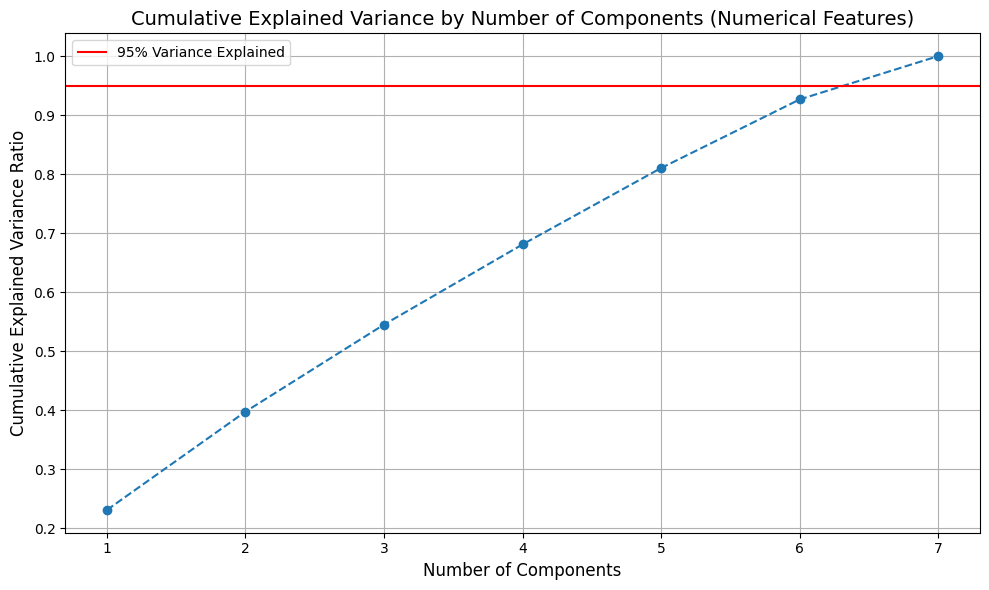

Number of components needed to explain 95% variance in numerical features: 7


In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Select only the numerical columns from the original DataFrame
numerical_df_original = df.select_dtypes(include=np.number)

# Separate features (all numerical columns except income-related ones if they are numerical)
# Assuming 'income' is the target and is categorical, so it won't be in numerical_df_original unless converted.
# If there are other numerical columns related to income (e.g., capital-gain/loss), keep them as features for now.
X_numerical = numerical_df_original.copy()

# Scale the numerical features
scaler_numerical = StandardScaler()
X_numerical_scaled = scaler_numerical.fit_transform(X_numerical)

# Apply PCA to the scaled numerical features
pca_numerical = PCA()
pca_numerical.fit(X_numerical_scaled)

# Analyze the explained variance
explained_variance_ratio_numerical = pca_numerical.explained_variance_ratio_
cumulative_explained_variance_numerical = np.cumsum(explained_variance_ratio_numerical)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance_numerical) + 1), cumulative_explained_variance_numerical, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components (Numerical Features)', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=12)
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Explained') # Add a line for 95% variance
plt.legend()
plt.tight_layout()
plt.show()

# Find the number of components needed to explain 95% of the variance
n_components_95_numerical = np.argmax(cumulative_explained_variance_numerical >= 0.95) + 1
print(f"Number of components needed to explain 95% variance in numerical features: {n_components_95_numerical}")

Having done this EDA on our dataset, we created a large amount of engineered columns based on binning and categorical to numerical encoding of our original columns which hopefully will prove useful for us in the modelling phase to come.

**NOTE: This project was completed with the assistance of Google Colab and its built in Gemini AI.**